In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

# Load and Prepare Data

#### Format of the Data
* last column of the data frame must contain the label and it must also be called "label"
* there should be no missing values in the data frame

In [2]:
data = pd.read_csv("iris.csv")
data.head() # See the 1st five indices of the Data Matrix

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop("Id", axis=1)
data = data.rename(columns={"species": "label"})

In [4]:
data.head() # See the 1st five indices of the Data Matrix

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train-Test-Split
This functions selects 'k' random of rows in Data and returns that and also the remaining matrix

In [5]:
def train_test_split(data, data_test_size):
    
    indices = data.index.tolist(); # Indicies = Indices of Matrix
    test_indices = random.sample(population=indices, k=data_test_size);
    test_df = data.loc[test_indices];   # test_df  = random rows selected from data matrix
    train_df = data.drop(test_indices); # train_df = remaining rows of data matrix 
    
    return train_df, test_df

In [6]:
random.seed(0);
train_df, test_df = train_test_split(data, data_test_size=20);

In [7]:
test_df; # This should print the 20 random data rows (remove ';')

In [8]:
train_df; # This should print the remaining random data rows (remove ';')

# Helper

In [9]:
data = train_df.values
data[:5 , :] #This prints 1st five rows [ (start : end) , (start : end)]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

# Data Purity
This functions checks the 'label' column and returns a bool value if its pure(true) or not(false)

In [10]:
def check_purity(data):
    label_column = data[: , -1];
    unique_class = np.unique(label_column); # This returns the unique values for an array

    if(len(unique_class) == 1):
        return True;
    else:
        return False;

In [11]:
check_purity(data[1:5 , :]) # This only has 1 class


True

In [12]:
check_purity(data[1:100 , :]) # This has 2 classes

False

# Classify
returns which class appears most often

In [13]:
def classify_data(data):
    label_column = data[: , -1];
    unique_classes , counts_unique_class = np.unique(label_column , return_counts=True); # This returns the unique values for an array
    max_index_classes = counts_unique_class.argmax();
    classification = unique_classes[max_index_classes];
    
    return classification;

In [14]:
classify_data(data[1:5 , :]) # This only has 1 class

'Iris-setosa'

In [15]:
classify_data(data[45:100 , :]) # This only has 2 class

'Iris-versicolor'

# Potential Splits
This returns a dictionary of { featureValue : [splits] }

In [16]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [17]:
potential_splits = get_potential_splits(data)
potential_splits

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.5999999999999996,
  3.4,
  3.6,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.15000000000000002,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.0

<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


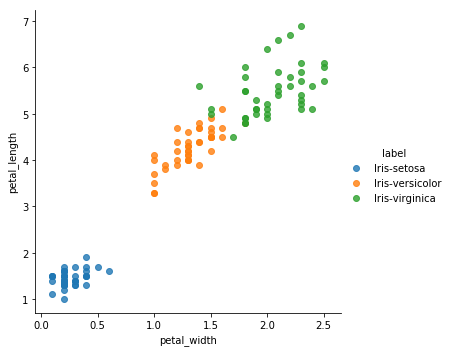

In [39]:
print(type(train_df))
print(train_df.head())
# Plot Data
sns.lmplot(data = train_df , x = "petal_width" , y = "petal_length" , hue = "label" , fit_reg = False , height = 5, aspect = 1);

## Plot Splits for Petal Width for now
sns.lmplot(data = train_df , x = "petal_width" , y = "petal_length" , hue = "label" , fit_reg = False , height = 5, aspect = 1);
plt.vlines(x = potential_splits[3] , ymin = 1, ymax = 7);

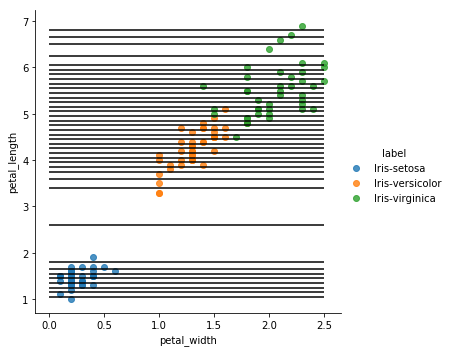

In [20]:
# Plot Splits for Petal Length for now
sns.lmplot(data = train_df , x = "petal_width" , y = "petal_length" , hue = "label" , fit_reg = False , height = 5, aspect = 1);
plt.hlines(y = potential_splits[2] , xmin = 0, xmax = 2.5);

# Split Data
returns data below and above the split feature and split value and data

In [21]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [22]:
split_feature = 3;
split_value = 0.8;
data_below, data_above = split_data(data , split_feature , split_value);

# Lowest Overall Entropy

In [23]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [24]:
calculate_entropy(data_below) # This should be 0

0.0

In [25]:
calculate_entropy(data_above) # This should be 1

1.0

In [26]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [27]:
calculate_overall_entropy(data_below, data_above) # This should be 0.646

0.6461538461538462

# Determine Best Split
returns feature and feature value for entropy

In [28]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9000; 
    for column_index in potential_splits: # Loop through keys
        for value in potential_splits[column_index]:# Loop through values
            
            data_below, data_above = split_data(data, split_column=column_index, split_value=value);
            current_overall_entropy = calculate_overall_entropy(data_below, data_above);

            if(current_overall_entropy <= overall_entropy):
                overall_entropy = current_overall_entropy;
                best_split_column = column_index;
                best_split_value = value;
    
    return best_split_column, best_split_value

In [29]:
determine_best_split(data, potential_splits)

(3, 0.8)

# Main Algothrim
This is where we use all the functions to make the decision tree

In [30]:
def decision_tree_algothrim(df , levels = 0 , min_samples = 2 , max_depth = 5):
    
    
    #Check if data is Numpy or Panda for data processing
    whatAmi = type(df);
    if( whatAmi == np.ndarray):
        data = df;
    else:
        global COLUMN_HEADERS;
        COLUMN_HEADERS = df.columns;
        data = df.values; # value Return a Numpy representation of the DataFrame
        
    # Check if Data is pure
    if((check_purity(data) == True) or (len(data) <= min_samples) or (levels == max_depth)):
        classificaiton = classify_data(data);
        return classificaiton;
    else:
        
        levels = levels + 1;
        
        # Get Potential Splits
        potential_splits = get_potential_splits(data);
        best_split_column, best_split_value = determine_best_split(data, potential_splits);
        data_below, data_above = split_data(data, best_split_column, best_split_value);
        
        # Get Question
        feature_name = COLUMN_HEADERS[best_split_column];
        question = "{feature} <= {splitValue}".format(feature = feature_name , splitValue = best_split_value);
        subTree = {question: []};
        
        # Find Answers
        yes_answers = decision_tree_algothrim(data_below , levels , min_samples , max_depth);
        no_answers = decision_tree_algothrim(data_above  , levels , min_samples , max_depth);
        
        # If answers are the same no need to ask question
        if(yes_answers == no_answers):
            subTree = yes_answers;
        else:
            subTree[question].append(yes_answers);
            subTree[question].append(no_answers);
        
        return subTree;

In [31]:
tree = decision_tree_algothrim(train_df , max_depth = 3);
pprint(tree);

{'petal_width <= 0.8': ['Iris-setosa',
                        {'petal_width <= 1.65': [{'petal_length <= 4.95': ['Iris-versicolor',
                                                                           'Iris-virginica']},
                                                 'Iris-virginica']}]}


# Classification
Take instance of an example and run it through our Decision Tree and see what label our tree gives it

In [32]:
def classify_example(instance , decisionTree):
    question = list(decisionTree.keys())[0];
    feature_name , comparsion_operator , value = question.split();
    
    # Find Answer
    if(instance[feature_name] <= float(value)):
        answer = decisionTree[question][0];
    else:
        answer = decisionTree[question][1];
    
    # If answer is not a label keep going down tree
    if(type(answer) != dict):
        return answer;
    else:
        # Keep Iterating
        nextQuestion = answer;
        return classify_example(instance , nextQuestion);

In [33]:
exampleInstance = test_df.iloc[0];
print(exampleInstance);

instanceLabel = classify_example(exampleInstance , tree);

print("ML Prediction:");
print(instanceLabel);

sepal_length                5.1
sepal_width                 2.5
petal_length                  3
petal_width                 1.1
label           Iris-versicolor
Name: 98, dtype: object
ML Prediction:
Iris-versicolor


# Accuracy
This calculates how 'right' our ML Algothrim is prediciting the actual value

In [34]:
def calculate_accuracy(df , tree):
    answers = list(df['label']);
    counter_right = 0;
    counter_overall = 0;
    
    sampleNumber = len(df);
    
    for i in range(sampleNumber):
        counter_overall = counter_overall + 1;
        exampleInstance = df.iloc[i];     
        predictionLabel = classify_example(exampleInstance , tree);
        
        if(predictionLabel == answers[i]):
            counter_right = counter_right + 1;
            
    accuracy = float(counter_right) / float(counter_overall);
    accuracy = accuracy * 100;
    return accuracy;

In [35]:
accur = calculate_accuracy(test_df , tree);
print(accur);

95.0
